In [1]:
import os
import sys
HOME = os.path.abspath('..')
sys.path.append(HOME)
os.chdir(HOME)

In [2]:
import cv2
import itertools
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt
from PIL import Image
from src.data.dataprep_mediapipe import *
from src.features.features_extractors_mediapipe import *

In [273]:
import pandas as pd

In [278]:
detector = FaceMeshDetector(maxFaces=1,
                            desiredFaceWidthHeight = (256,256))
detector.run_live_v2(save_faces_objs=True)

KeyboardInterrupt: 

In [279]:
import numpy as np
import math as m
  
def Rx(theta):
    
    theta = np.radians(theta)
    return np.matrix([[ 1, 0           , 0           ],
                   [ 0, m.cos(theta),-m.sin(theta)],
                   [ 0, m.sin(theta), m.cos(theta)]])
  
def Ry(theta):
    theta = np.radians(theta)
    return np.matrix([[ m.cos(theta), 0, m.sin(theta)],
                   [ 0           , 1, 0           ],
                   [-m.sin(theta), 0, m.cos(theta)]])
  
def Rz(theta):
    theta = np.radians(theta)
    return np.matrix([[ m.cos(theta), -m.sin(theta), 0 ],
                   [ m.sin(theta), m.cos(theta) , 0 ],
                   [ 0           , 0            , 1 ]])

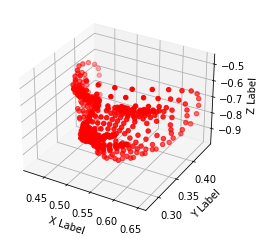

In [280]:
f = detector.live_faces_objs[10][0]
points=f['landmarks_3D']
pose = f['pose']

points = (points-points.min())/(points.max()-points.min())

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#t_points = (Ry(-pose[1])*Rx(pose[0])*Rz(0)@points.T).T

R= Rx(pose[0])@Ry(-pose[1])@Rz(pose[2])
t_points = (R@points.T).T

ax.scatter(t_points[:,0],t_points[:,2],-t_points[:,1],c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


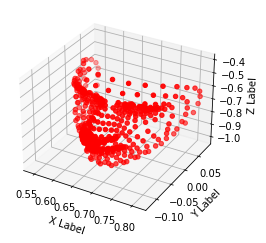

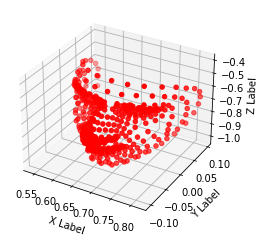

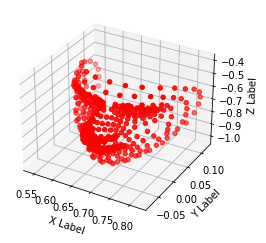

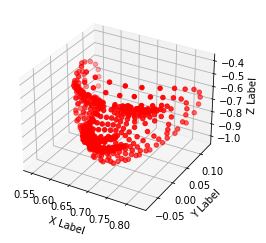

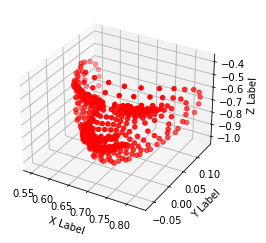

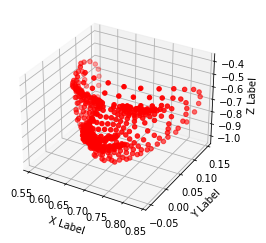

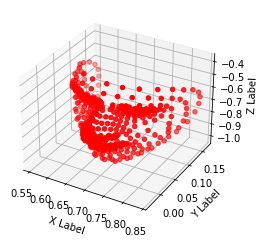

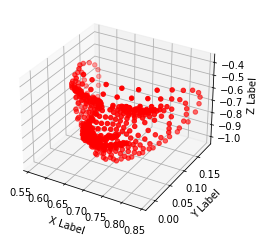

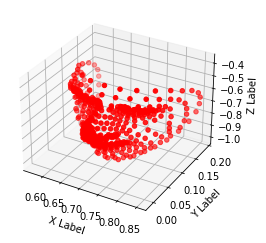

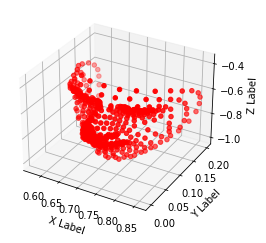

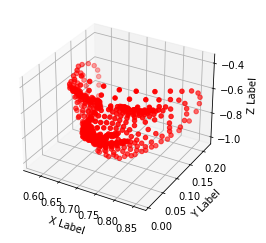

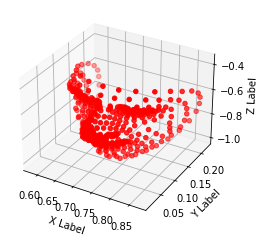

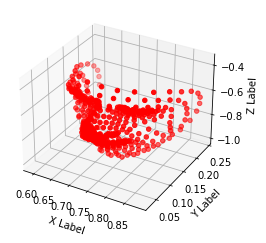

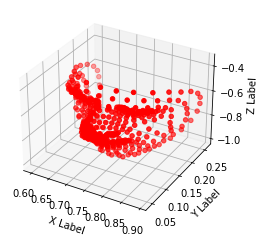

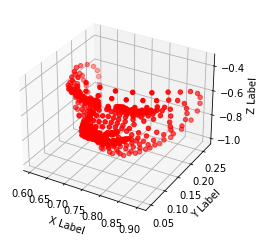

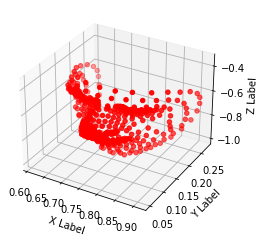

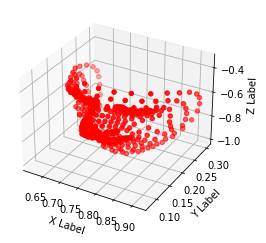

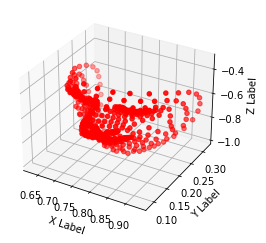

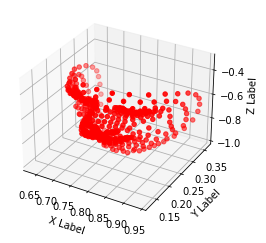

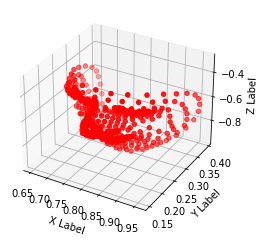

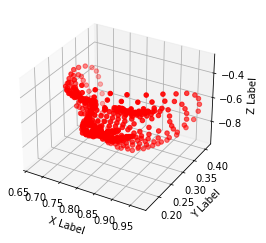

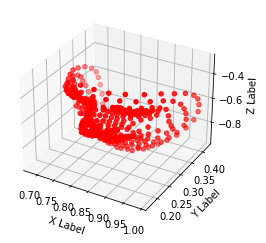

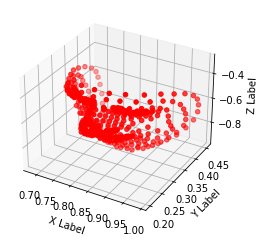

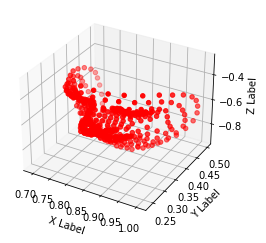

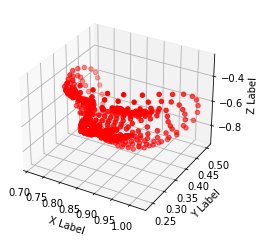

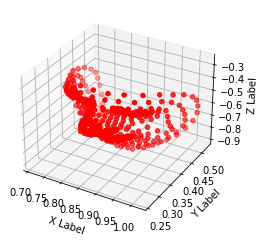

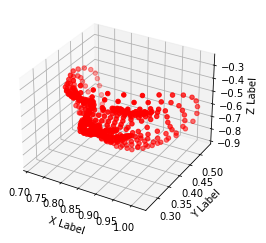

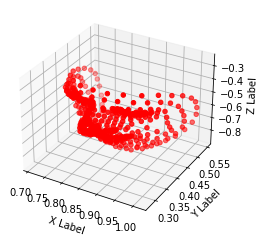

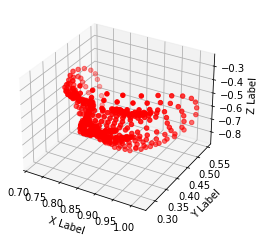

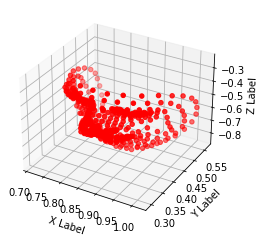

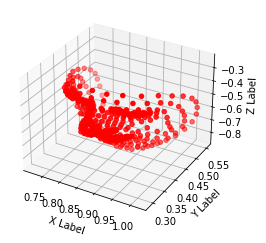

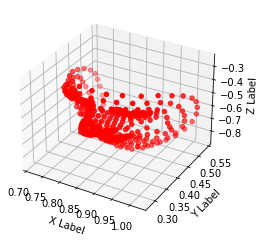

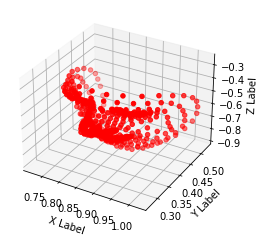

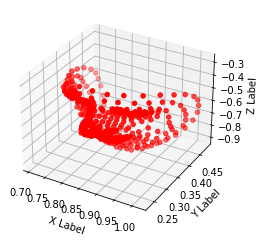

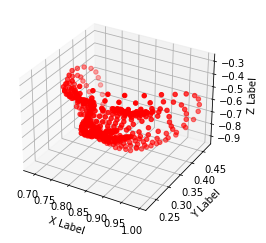

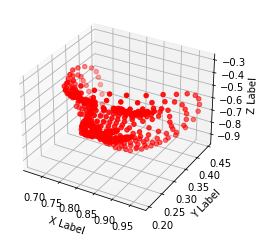

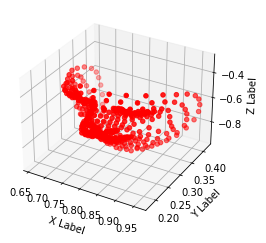

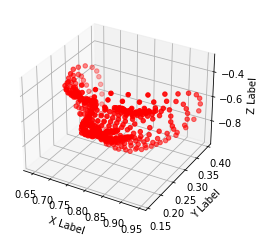

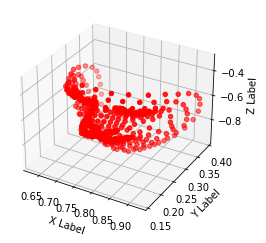

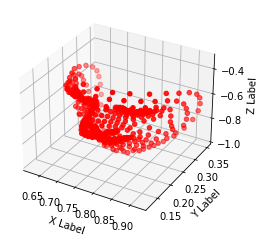

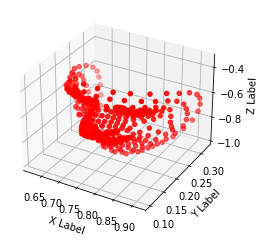

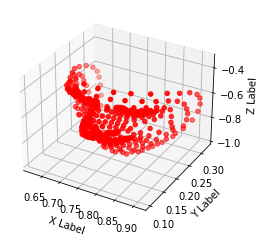

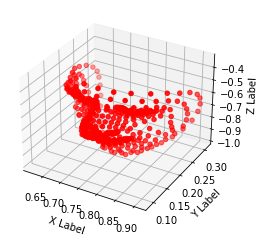

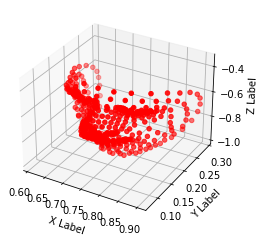

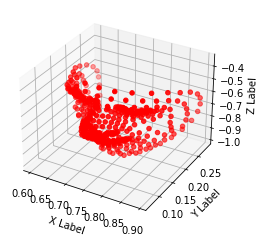

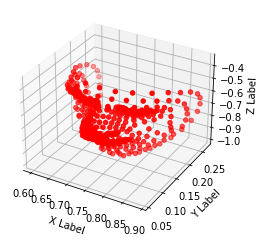

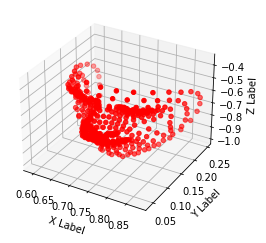

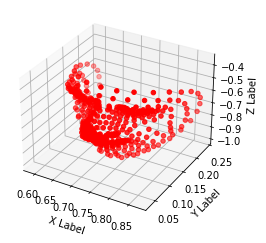

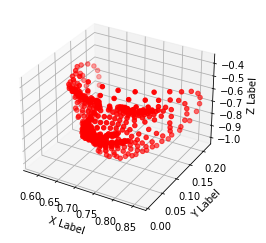

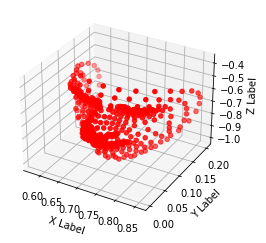

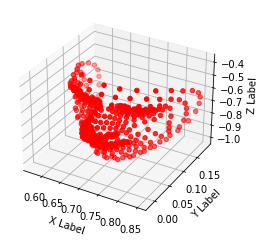

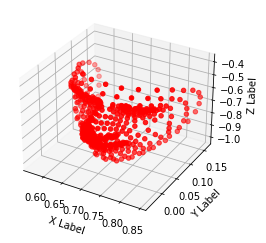

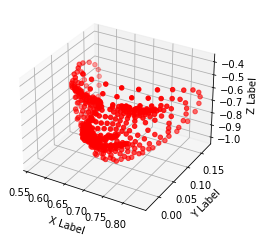

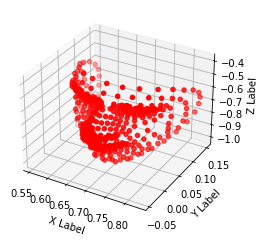

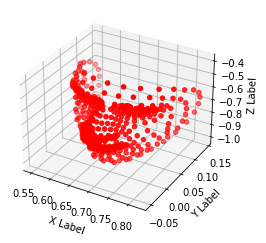

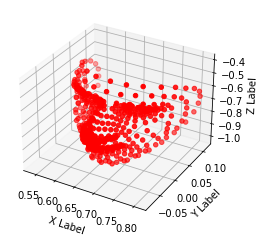

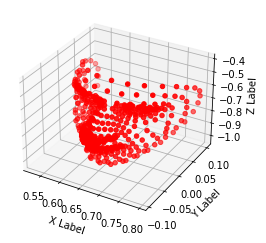

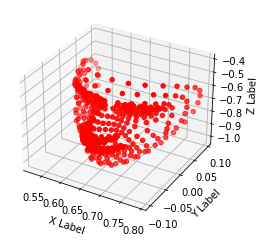

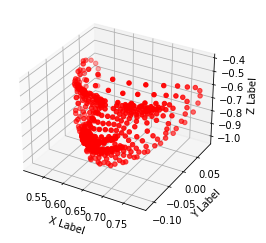

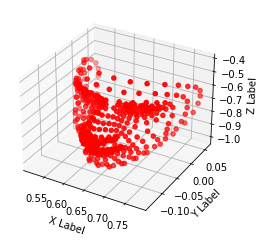

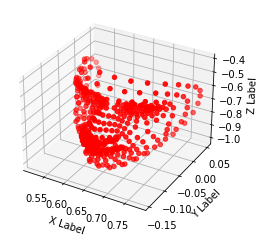

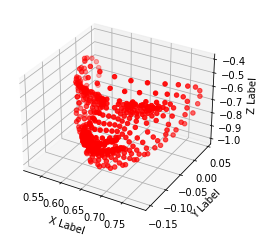

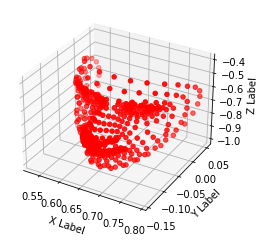

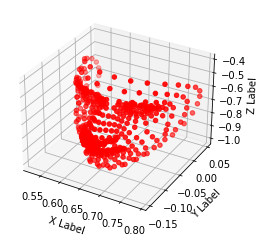

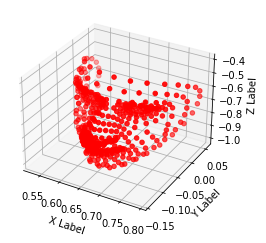

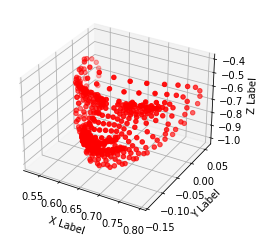

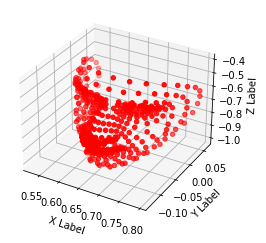

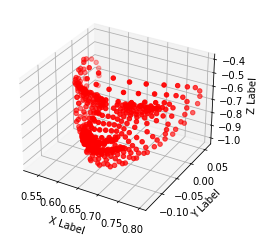

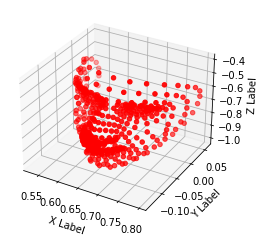

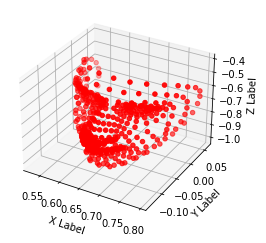

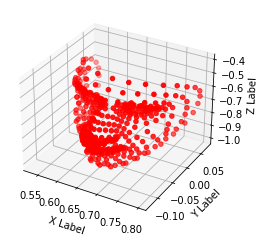

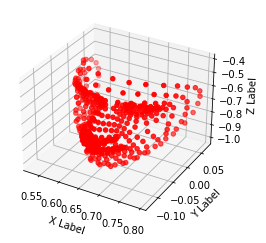

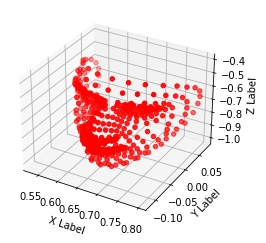

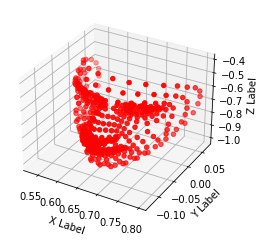

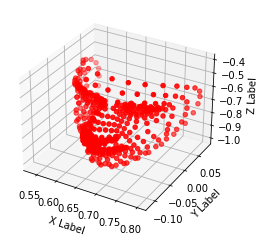

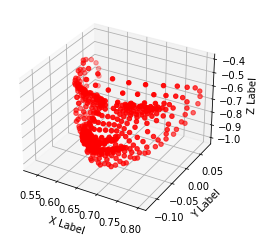

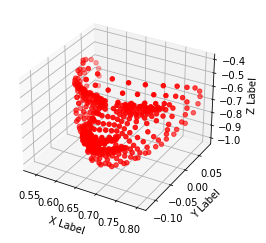

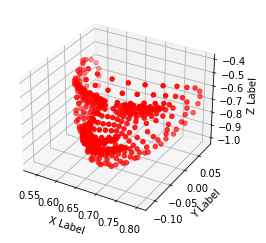

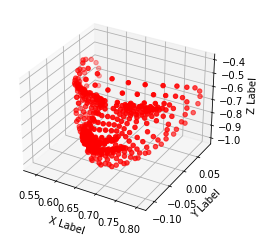

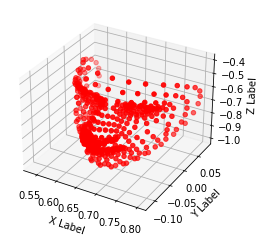

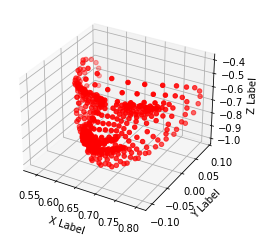

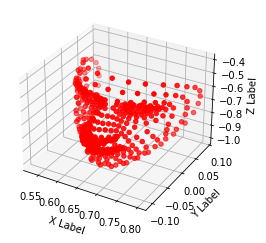

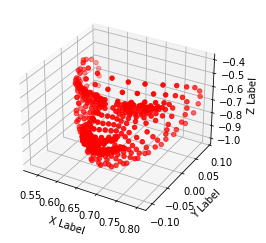

In [215]:

#Save Videos
#video_name = f'data/created_videos/processed_video_{uuid_}.avi'
#video = cv2.VideoWriter(video_name, 0, FPS, (SIZE,SIZE))
for f in detector.live_faces_objs:
    f=f[0]
    
    points=f['landmarks_3D']
    pose = f['pose']

    points = (points-points.min())/(points.max()-points.min())

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')


    #t_points = (Ry(-pose[1])*Rx(pose[0])*Rz(0)@points.T).T
    
    R= Rx(pose[0])@Ry(-pose[1])@Rz(pose[2])
    t_points = (R@points.T).T
    for (x, y) in landmarks:
        cv2.circle(img,
                   (int(round(x)),int(round(y))),
                   self.desiredFaceWidthHeight[0]//256,
                   (0, 0, 255),
                   -1)


In [197]:
points = (points-points.min())/(points.max()-points.min())

In [200]:
points.min()

0.0

In [28]:
landmarks_left_to_right_mapping = {37:267,
                                    72:302,
                                    38:268,
                                    82:312,
                                    87:317,
                                    86:316,
                                    85:315,
                                    84:314,
                                    39:269,
                                    73:303,
                                    41:271,
                                    81:311,
                                    178:402,
                                    179:403,
                                    180:404,
                                    181:405,
                                    40:270,
                                    74:304,
                                    42:272,
                                    80:310,
                                    88:318,
                                    89:319,
                                    90:320,
                                    91:321,
                                    185:409,
                                    184:408,
                                    183:407,
                                    191:415,
                                    95:324,
                                    96:325,
                                    77:307,
                                    146:375}


bo = BarycentricOperations(landmarks_left_to_right_mapping)

In [29]:
a = [bo.global_asymmetry_index(i[0]['processed_landmarks']) for i in detector.live_faces_objs]

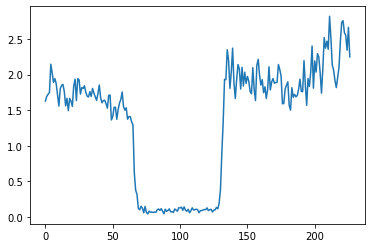

In [30]:
plt.plot(a)

In [15]:


df = pd.DataFrame([i[0]['pose'] for i in detector.live_faces_objs],columns=['pitch','yaw','roll'])

<AxesSubplot:>

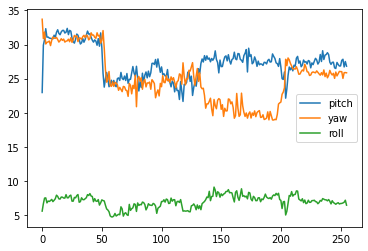

In [16]:
df.plot()

In [4]:
img=np.array(Image.open('data/dummy_data/samir/control_smile.jpeg'))

In [5]:
h,w,_ = img.shape
detector = FaceMeshDetector(frame_height=h,frame_width=w)
aligned_img,faces = detector.process(img)

In [6]:
face = faces[0]

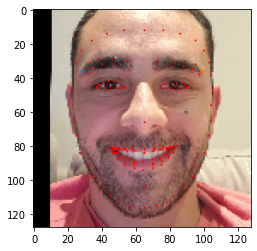

In [19]:
plt.imshow(detector.draw_faces(aligned_img,faces))
plt.scatter(*face['processed_landmarks']['left_eyebrow'][70],marker='.')
plt.scatter(*face['processed_landmarks']['right_eyebrow'][300],marker='.')

In [7]:
face['processed_landmarks']['left_eyebrow']

{65: array([46.83370213, 31.99275907]),
 66: array([46.08521813, 28.79292828]),
 70: array([29.01556459, 35.69952384]),
 105: array([38.41183809, 28.94976473]),
 107: array([54.75470117, 29.70589526]),
 46: array([31.22801882, 37.08112318]),
 52: array([39.81039379, 31.8889184 ]),
 53: array([34.70368668, 33.75308531]),
 55: array([56.0710845 , 35.00416618]),
 63: array([32.5689935 , 31.48344977])}

In [18]:
face['processed_landmarks']['right_eyebrow'][300]

array([98.80577751, 35.80695669])

NameError: name 'f' is not defined

In [8]:
roi = ROIExtractor(aligned_img,face['processed_landmarks'],debug=True)

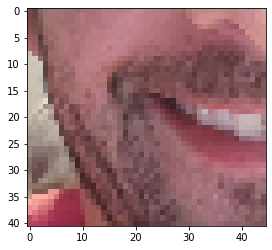

(array([[[128,  73,  71],
         [102,  67,  65],
         [138, 103,  96],
         ...,
         [205, 143, 148],
         [205, 150, 153],
         [212, 161, 165]],
 
        [[122,  71,  67],
         [106,  68,  67],
         [133,  96,  87],
         ...,
         [202, 137, 143],
         [214, 155, 159],
         [216, 157, 161]],
 
        [[124,  77,  71],
         [114,  74,  72],
         [121,  87,  80],
         ...,
         [203, 139, 140],
         [210, 146, 147],
         [221, 157, 158]],
 
        ...,
 
        [[232, 144, 149],
         [215, 120, 130],
         [203,  98, 113],
         ...,
         [128,  87,  93],
         [146, 105, 111],
         [142, 101, 107]],
 
        [[181,  77,  98],
         [202,  93, 114],
         [187,  76,  96],
         ...,
         [131,  90,  96],
         [142, 101, 107],
         [128,  87,  93]],
 
        [[181,  69,  94],
         [180,  68,  93],
         [174,  63,  88],
         ...,
         [129,  88,  96],
  

In [9]:
roi.left_mouth()

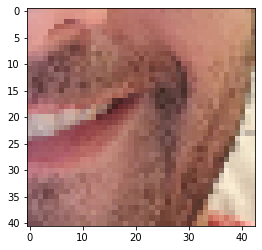

(array([[[211, 160, 166],
         [214, 162, 161],
         [220, 161, 159],
         ...,
         [211, 164, 134],
         [200, 154, 123],
         [151, 116,  88]],
 
        [[220, 164, 163],
         [224, 164, 162],
         [226, 161, 155],
         ...,
         [211, 162, 132],
         [207, 161, 131],
         [165, 130, 100]],
 
        [[224, 160, 161],
         [223, 160, 155],
         [227, 162, 156],
         ...,
         [207, 158, 128],
         [205, 158, 123],
         [161, 127,  99]],
 
        ...,
 
        [[132,  91,  97],
         [150, 109, 113],
         [146, 106, 107],
         ...,
         [235, 217, 193],
         [227, 209, 185],
         [223, 201, 178]],
 
        [[128,  87,  93],
         [132,  91,  95],
         [148, 108, 109],
         ...,
         [244, 212, 187],
         [233, 212, 186],
         [223, 206, 179]],
 
        [[119,  78,  84],
         [119,  78,  82],
         [122,  81,  84],
         ...,
         [227, 140, 130],
  

In [10]:
roi.right_mouth()

In [9]:
(1,2,3,4)[2]

3

TypeError: unhashable type: 'slice'

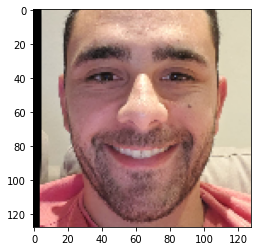

In [8]:

plt.imshow(aligned_img)
plt.scatter(face['processed_landmarks'][:,0],face['processed_landmarks'][:,1])

In [19]:
face['processed_landmarks']['right_eye_center']

[127,162,67,140],[356,389,297,378]

{130: array([87.1243901 , 41.05788901])}

In [29]:
face['landmarks'][[127,162,67,140],:].mean(0)

array([28.87499872, 49.85772687])

In [14]:
def get_sorted_dict_values_by_key(dictionary, reverse=False):
    return [dictionary[key] for key in sorted(dictionary.keys(), reverse=reverse)]


def processed_landmark_dict_to_array(processed_landmarks):
    flattened_landmark_dict = {
        k: v for i in processed_landmarks.values() for k, v in i.items()
    }

    flattened_sorted_landmark_array = np.vstack(
        get_sorted_dict_values_by_key(flattened_landmark_dict)
    )

    return flattened_sorted_landmark_array


processed_landmark_dict_to_array(face['processed_landmarks']).shape

(130, 2)

In [9]:
face['processed_landmarks']

defaultdict(<function src.data.dataprep_mediapipe.process_landmarks.<locals>.<lambda>()>,
            {'mouth': {0: array([64.66301358, 85.34971571]),
              267: array([72.02516977, 84.12954106]),
              13: array([64.677842  , 87.60965411]),
              14: array([64.54799753, 94.17371495]),
              269: array([78.53129236, 83.70363871]),
              270: array([82.8192852 , 83.37395566]),
              17: array([64.59514729, 99.65545144]),
              146: array([42.71874407, 88.55947813]),
              402: array([75.68327894, 91.5235638 ]),
              405: array([77.58785458, 95.84671895]),
              409: array([86.17276948, 83.18407911]),
              415: array([83.6973494 , 84.50183074]),
              291: array([88.63670661, 83.25735115]),
              37: array([57.22614749, 84.38308788]),
              39: array([50.59497285, 84.25724343]),
              40: array([46.11277659, 84.16376287]),
              178: array([53.25583536, 92.183

In [112]:
face['processed_landmarks']

defaultdict(<function src.data.dataprep_mediapipe.process_landmarks.<locals>.<lambda>()>,
            {'mouth': {},
             'nose': {},
             'head': {},
             'left_eye': {362: array([77.01733142, 41.65881964]),
              398: array([78.31470163, 40.57598796]),
              384: array([81.04701116, 39.14051708]),
              385: array([84.72920305, 38.33470755]),
              386: array([88.2373112 , 38.31822511]),
              387: array([91.70463711, 38.99384856]),
              388: array([93.91361618, 39.9267804 ]),
              466: array([95.23040839, 40.63083858]),
              263: array([96.26655388, 41.20876502]),
              249: array([94.67553684, 42.03775799]),
              390: array([92.99625766, 42.55420287]),
              373: array([90.66098257, 43.04313904]),
              374: array([87.14994245, 43.24944364]),
              380: array([83.64864389, 42.93097003]),
              381: array([80.29011171, 42.32033792]),
            

In [16]:
import mediapipe as mp

In [49]:
z = set([362,398,384,
 385,386,387,388,
 466,263,249,390,
 373,374,380,381,382]) 

In [48]:
len(b),

16

In [50]:
len(z)

16